In [ ]:
# Import dependencies & setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
import gmaps


# Google developer API key
from config import gkey

# # Access maps with unique API key
gmaps.configure(api_key=gkey)

In [ ]:
# Save path to data set in a variable
data_file = "Zillow_Home_Value_Index_2019_August.csv"

# Use Pandas to read data
data_file_pd = pd.read_csv(data_file)
data_file_pd.head(10)

In [ ]:
df = data_file_pd[["Region", "Median Home Value"]]
df

In [ ]:
df = df.dropna(how='all')
df

In [85]:
# Save path to the other data set in a variable
data_file_zip = "../Raleigh_zip_pop.csv"

# Use Pandas to read data
data_file_zip_pd = pd.read_csv(data_file_zip)
data_file_zip_pd.head(10)

,Unnamed: 0,Zipcode,Population,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,district,lat,lng
0,31,27613,43484.0,87774.0,47204.0,3.971576,2.410082,North,35.923982,-78.716682
1,32,27609,33103.0,57924.0,43475.0,11.301091,2.051174,North,35.842711,-78.631850
2,33,27617,18380.0,80471.0,55611.0,6.430903,1.218716,Northwest,35.904084,-78.768873
3,34,27615,42863.0,78709.0,48411.0,5.881530,2.286354,North,35.902182,-78.627742
4,35,27616,52679.0,64212.0,27117.0,11.887090,3.883901,Northeast,35.870606,-78.533618
5,36,27612,37384.0,73402.0,47259.0,7.158143,2.126578,North,35.851876,-78.702013
6,37,27614,33242.0,102950.0,54074.0,3.011251,1.618435,North,35.948820,-78.613315
7,38,27604,46908.0,54081.0,26951.0,14.161763,3.180694,Northeast,35.816936,-78.563843
8,39,27603,53693.0,60924.0,29626.0,19.514648,3.177323,Southwest,35.683682,-78.664144
9,40,27607,29067.0,74786.0,32774.0,11.996422,1.448378,Northwest,35.818811,-78.714040


In [86]:
df_mi = pd.DataFrame(data_file_zip_pd.groupby(["district"]).mean()["Household Income"])
df_mi.columns = ["Median Household Income"]
df_mi.reset_index()
df_mi = df_mi.reset_index()
df_mi
df_mi.columns = ["Region","Median Household Income"]
df_mi

,Region,Median Household Income
0,Downtown,65888.666667
1,North,80151.800000
2,Northeast,59146.500000
3,Northwest,77628.500000
4,Southeast,48897.000000
5,Southwest,55732.000000


In [87]:
df_mi_mhv = df.merge(df_mi,on="Region")
df_mi_mhv

,Region,Median Home Value,Median Household Income
0,North,"$340,157",80151.800000
1,Northwest,"$408,116",77628.500000
2,Northeast,"$229,515",59146.500000
3,Southeast,"$218,866",48897.000000
4,Downtown,"$406,902",65888.666667
5,Southwest,"$497,774",55732.000000


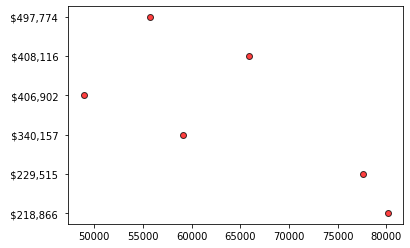

In [88]:
x_axis = df_mi_mhv["Median Household Income"]
y_axis = df_mi_mhv["Median Home Value"]

y = np.sort(y_axis)

plt.scatter(x_axis.values, y, marker="o", facecolors="red", edgecolors="black",
         alpha=0.75)

In [89]:
# df_mi_mhv['Median Home Value'].astype('float')
float_Df = df_mi_mhv[df_mi_mhv.columns[1:]].replace('[/$,]', '', regex=True).astype(float)
float_Df['district'] = df_mi_mhv['Region']
float_Df = float_Df.set_index('district')
float_Df

,Median Home Value,Median Household Income
district,,
North,340157.0,80151.800000
Northwest,408116.0,77628.500000
Northeast,229515.0,59146.500000
Southeast,218866.0,48897.000000
Downtown,406902.0,65888.666667
Southwest,497774.0,55732.000000


In [90]:
df_3 = data_file_zip_pd.groupby(['district'])
lat = df_3['lat'].mean()
lon = df_3['lng'].mean()
mhv = float_Df['Median Home Value']
mhv_df = pd.DataFrame({'lat':lat,'lng':lon,'Median Home Value':mhv})
mhv_df

,lat,lng,Median Home Value
Downtown,35.791580,-78.644088,406902.0
North,35.893914,-78.658320,340157.0
Northeast,35.843771,-78.548731,229515.0
Northwest,35.861447,-78.741456,408116.0
Southeast,35.743602,-78.536408,218866.0
Southwest,35.710637,-78.692668,497774.0


In [91]:
mh_values = mhv_df['Median Home Value']

# Sources:
fig = gmaps.figure()

# heat_layer = gmaps.heatmap_layer(mhv_df, weights=mh_values)
# # heat_layer = gmaps.heatmap_layer(mhv_df)
# fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))